In [1]:
#hide
from steel_segmentation.core import *
from steel_segmentation.data import *
from matplotlib import pyplot as plt

/home/mmb/miniconda3/envs/env_nbdev/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# Steel defect detection use case

> A walk through different solutions for the Severstal Kaggle competition.

This repository wants to explore different solutions for the [Severstal](https://www.kaggle.com/c/severstal-steel-defect-detection/overview) competition (ended in November 2019) by the Living Lab Research team of [IP4FVG](https://www.ip4fvg.it/), the Digital Innovation Hub of Friuli Venezia Giulia.

## Install

To install this package you need to fullfill the following requirements.

1. make sure to install properly the `pytorch` ([pytorch installation](https://pytorch.org/get-started/locally/)) and `fastai` ([fastai installation](https://docs.fast.ai/#Installing)) packages.

2. download the data from Kaggle. If this is the first time with the API, you'll need a [Kaggle](https://www.kaggle.com/) account. Then follow this [link](https://github.com/Kaggle/kaggle-api) to understand how to download the credentials in the repository directory `kaggle.json` file.

3. run the following cell code (if is not already done)

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp ../kaggle.json ~/.kaggle/kaggle.json

Now you're ready to install the Kaggle API with:

In [ ]:
!pip install kaggle

And then the download and unzip the data with:

In [ ]:
!kaggle competitions download -c severstal-steel-defect-detection -p {path}

In [ ]:
!unzip -q -n {path}/severstal-steel-defect-detection.zip -d {path}

Finally you can install the package with:

```
git clone https://github.com/marcomatteo/steel_segmentation.git
pip install -e steel_segmentation
```

## Developing

To set up the developer enviroment to build the package or try different Deep Learning models using this repository, follow these commands:

```
conda create -n env_nbdev
conda activate env_nbdev
conda install -c fastai -c pytorch fastai
conda install -c conda-forge jupyter_contrib_nbextensions
git clone https://github.com/fastai/nbdev
pip install -e nbdev
git clone https://github.com/marcomatteo/steel_segmentation.git
cd steel_segmentation
nbdev_install_git_hooks
jupyter notebook
```

If there's some issues with `nbdev`, try to uninstall with `pip uninstall nbdev` and install again with `pip install nbdev`.
Now you can edit the Jupyter Notebook files.

To save the new functions or classes from the notebooks to a `.py` module in `steel_segmentation` (only the cells with #exp at the beginning) and create the relative documentation, run:

```
nbdev_build_lib
nbdev_build_docs
```

Hint: for a complete understanding of `nbdev` check this [link](https://nbdev.fast.ai/).

NB: I tried to work in MacOS and Linux enviroment, not sure this is working also in Windows.

## How to use

With the `show_defects` function you can easly view the defected images:

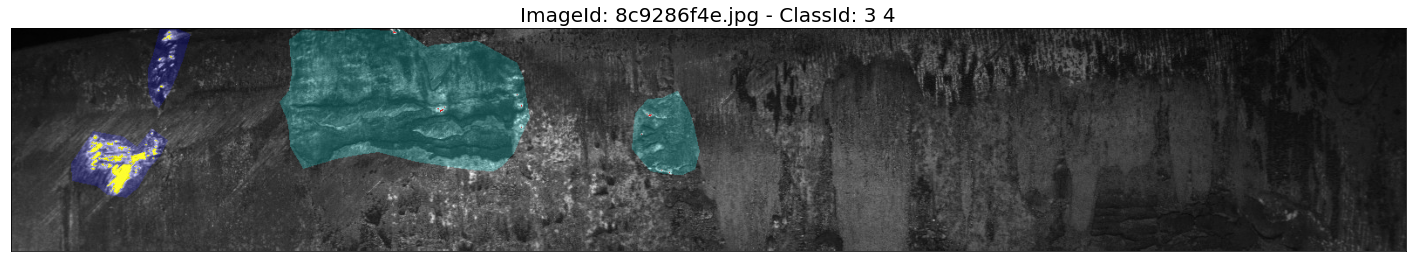

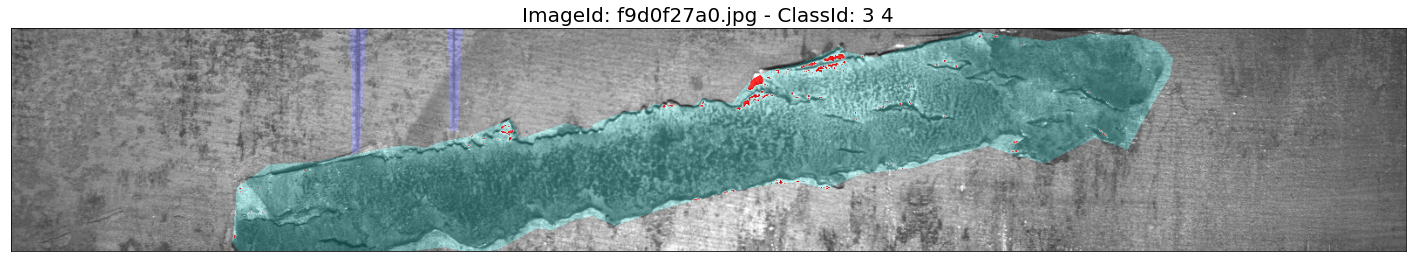

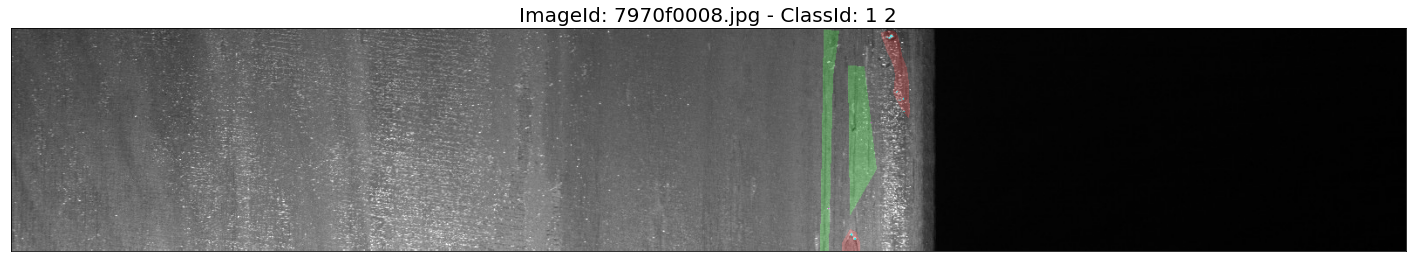

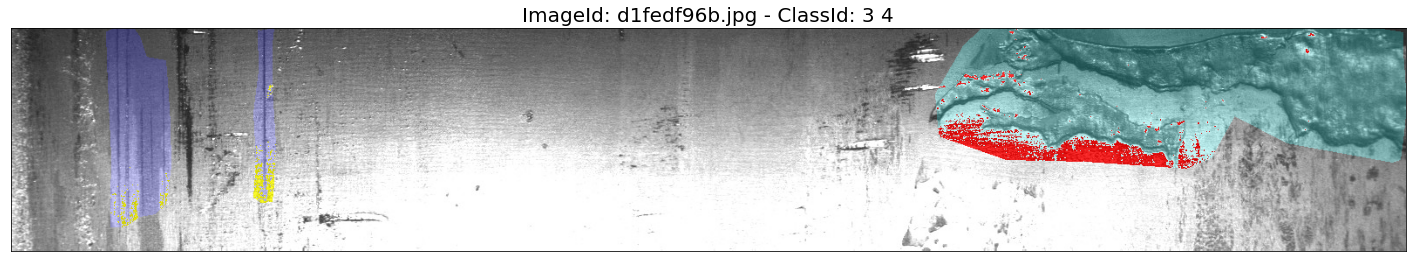

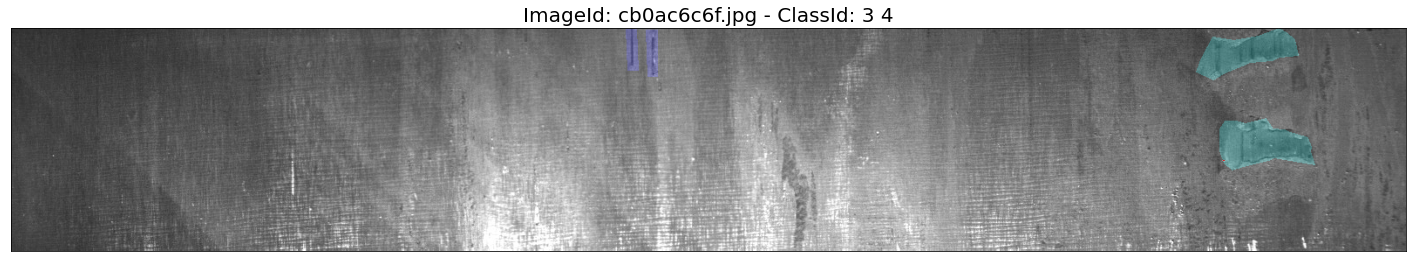

In [ ]:
show_defects(n=5, multi_defects=True)

In [3]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted 02_preprocessing.ipynb.
Converted index.ipynb.
